In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


Bad key "text.kerning_factor" on line 4 in
/Users/williampaterson/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import matplotlib.dates as dates

In [3]:
A = 'Quality_data.csv'

quality_data = pd.read_csv(A)
quality_data

,Product ID,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date,Quality Characteristic 7
0,26.0,1,A,412,653,248,172,s,a,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24,0
1,50.0,2,A,408,793,221,147,s,b,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42,0
2,72.0,1,A,407,608,210,117,s,a,APU3b,4,O,a,b,0.0,1,01.10.18 15:39:57,01.10.18 16:50:40,0
3,72.0,1,A,407,608,248,142,s,a,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53,0
4,74.0,2,A,408,508,205,176,s,b,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18908,NaN,1,A,407,628,210,122,s,b,APU3b,1,I,a,m,0.0,1,31.01.19 22:15:06,31.01.19 22:15:06,0
18909,NaN,1,A,407,655,229,172,s,b,APU3b,1,I,a,m,0.0,1,31.01.19 22:16:17,31.01.19 22:22:51,0
18910,NaN,2,A,407,657,266,122,s,b,APU3b,1,I,a,b,0.0,1,31.01.19 22:27:37,31.01.19 22:36:22,0
18911,NaN,1,A,407,655,229,172,s,b,APU3b,1,I,a,m,0.0,1,31.01.19 22:43:50,31.01.19 22:50:55,0


In [4]:
quality_data.iloc[2, 0]

72.0

In [5]:
new_quality = quality_data

for i in range(len(quality_data)-1, -1 , -1):
    if np.array(quality_data.iloc[i, 13]) == 'b' or (np.array(quality_data.iloc[i,0]) > 0) == False:
        new_quality = new_quality.drop(new_quality.index[i])

In [18]:
B = 'Process_disturbances.csv'

process_disturbances = pd.read_csv(B)
process_disturbances

,Start,End,Total duration,Alarm text,Alarm class
0,01/10/2018 01:35,01/10/2018 06:00,15897,a,S
1,01/10/2018 03:04,01/10/2018 06:00,10538,b,E
2,01/10/2018 06:00,01/10/2018 06:00,14,a,S
3,01/10/2018 06:15,01/10/2018 06:16,71,a,S
4,01/10/2018 06:15,01/10/2018 06:16,66,c,O
...,...,...,...,...,...
15631,31/01/2019 11:30,31/01/2019 11:45,906,c,O
15632,31/01/2019 11:52,31/01/2019 11:53,28,a,S
15633,31/01/2019 11:52,31/01/2019 11:53,23,c,O
15634,31/01/2019 11:57,31/01/2019 11:58,33,a,S


In [19]:
C = 'Product_tracking_information.csv'

#tracking points
#Z3200 - entry into process
#Z3299 - exit out of process

track_info = pd.read_csv(C)
#track_info

In [41]:
new_quality['Quality rating'].value_counts()

1    9875
2    2508
0       3
Name: Quality rating, dtype: int64

In [42]:
new_quality['No.'] = np.arange(len(new_quality))
new_quality

,Product ID,Product characteristic 1,Quality Characteristic 8,Quality Characteristic 1,Quality Characteristic 2,Quality Characteristic 3,Quality Characteristic 4,Quality Characteristic 5,Quality Characteristic 6,Process Characteristic 1,Process Characteristic 2,Rework characteristic 1,Rework characteristic 2,Repair characteristic 1,Rework Minutes,Quality rating,Capture Date,Rework Date,Quality Characteristic 7,No.
0,26.0,1,A,412,653,248,172,s,a,APU3b,1,I,c,m,0.0,1,01.10.18 06:34:54,01.10.18 06:35:24,0,0
1,50.0,2,A,408,793,221,147,s,b,APU3b,1,I,b,d,285.0,1,01.10.18 07:23:12,01.10.18 08:13:42,0,1
3,72.0,1,A,407,608,248,142,s,a,APU3b,2,I,c,g,0.5,1,01.10.18 07:25:09,01.10.18 07:32:53,0,2
4,74.0,2,A,408,508,205,176,s,b,APU3b,3,I,b,d,25.0,1,01.10.18 07:51:32,01.10.18 09:41:50,0,3
5,74.0,2,A,410,508,219,176,s,b,APU3b,3,I,b,d,0.0,1,01.10.18 07:50:14,01.10.18 09:42:16,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18878,76600.0,1,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 20:47:29,31.01.19 20:47:29,0,12381
18879,76606.0,2,A,406,509,216,103,s,a,APU3a,3,O,c,ad,60.0,2,31.01.19 22:02:52,01.02.19 01:02:00,0,12382
18880,76611.0,2,A,407,655,282,172,s,b,APU3b,1,I,a,g,0.0,1,31.01.19 19:23:26,31.01.19 19:23:26,0,12383
18881,76612.0,2,A,407,655,229,172,s,b,APU3b,1,I,c,m,0.4,1,31.01.19 20:23:27,31.01.19 20:32:07,0,12384


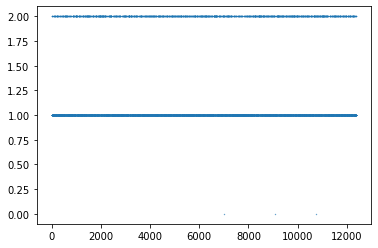

In [43]:
plt.scatter(new_quality.iloc[:,19],new_quality.iloc[:,15], s=0.1)

Text(0.5, 1.0, 'Plot showing the probability of each Quality Rating against the cumulative \n number of disturbances')

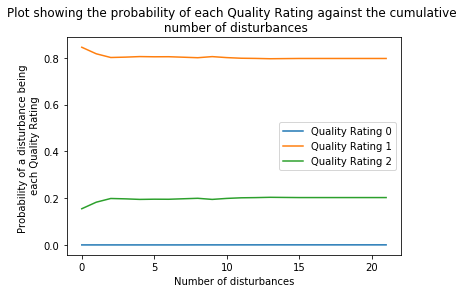

In [47]:
QR0=plt.plot(numero_list_0, label="Quality Rating 0")
QR1=plt.plot(numero_list_1, label="Quality Rating 1")
QR2=plt.plot(numero_list_2, label="Quality Rating 2")
plt.legend()
plt.xlabel("Number of disturbances")
plt.ylabel("Probability of a disturbance being \n each Quality Rating")
plt.title("Plot showing the probability of each Quality Rating against the cumulative \n number of disturbances")

In [7]:
numero_list1 = []
numero1 = 0
for i in range(23):
    numero1 = new_quality[(i-1)*821:i*821]
    prob = numero1['Quality rating'].value_counts('1')
    numero_list1.append(prob)

#numero_list1

In [49]:
numero_list_1_1 = []
numero_list_2_1 = []
numero_list_0_1 = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(1,16,1):
    unos1 = numero_list1[i][1]
    numero_list_1_1.append(unos1)
    dos1 = numero_list1[i][2]
    numero_list_2_1.append(dos1)

zeros10 = numero_list1[9][0]
numero_list_0_1.insert(9,zeros10)
zeros11 = numero_list1[12][0]
numero_list_0_1.insert(12,zeros11)
zeros12 = numero_list1[14][0]
numero_list_0_1.insert(14,zeros12)

Text(0.5, 1.0, 'Plot showing the probability of each Quality Rating against a subset \n of disturbances ordered chronologically')

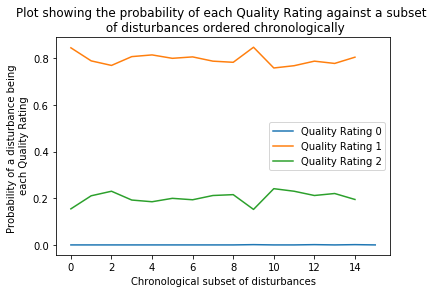

In [50]:
QR0_1=plt.plot(numero_list_0_1, label="Quality Rating 0")
QR1_1=plt.plot(numero_list_1_1, label="Quality Rating 1")
QR2_1=plt.plot(numero_list_2_1, label="Quality Rating 2")

plt.legend()
plt.xlabel("Chronological subset of disturbances")
plt.ylabel("Probability of a disturbance being \n each Quality Rating")
plt.title("Plot showing the probability of each Quality Rating against a subset \n of disturbances ordered chronologically")

In [104]:
from pandas import Timestamp
from collections import Counter

In [105]:
#new_quality.head(112)
day = new_quality['Capture Date']

In [348]:
#new_quality['Capture Date'] = pd.to_datetime(new_quality['Capture Date'])
#newnew_quality = new_quality.sort_values(by='Capture Date')

day = pd.to_datetime(day,format = "%d.%m.%y %H:%M:%S")
data = new_quality['Quality rating']
data.index = day

day

0       2018-10-01 06:34:54
1       2018-10-01 07:23:12
3       2018-10-01 07:25:09
4       2018-10-01 07:51:32
5       2018-10-01 07:50:14
                ...        
18878   2019-01-31 20:47:29
18879   2019-01-31 22:02:52
18880   2019-01-31 19:23:26
18881   2019-01-31 20:23:27
18882   2019-01-31 20:23:27
Name: Capture Date, Length: 12386, dtype: datetime64[ns]

In [427]:
# Change the value in resample to d,m,H as you deem fit
dailyaverage = data.resample('d').mean()
#print(dailyaverage.to_string())
dailyaverage

Capture Date
2018-10-01    1.136364
2018-10-02    1.182540
2018-10-03    1.118012
2018-10-04    1.164179
2018-10-05    1.244898
                ...   
2019-01-27         NaN
2019-01-28    1.191489
2019-01-29    1.180124
2019-01-30    1.205882
2019-01-31    1.171429
Freq: D, Name: Quality rating, Length: 123, dtype: float64

In [428]:
dailycounts = data.resample('d').count()
dailycounts

Capture Date
2018-10-01    110
2018-10-02    126
2018-10-03    161
2018-10-04    134
2018-10-05    147
             ... 
2019-01-27      0
2019-01-28    141
2019-01-29    161
2019-01-30    136
2019-01-31    140
Freq: D, Name: Quality rating, Length: 123, dtype: int64

Text(0.5, 1.0, 'Plot of the number of disturbances per day against the dates')

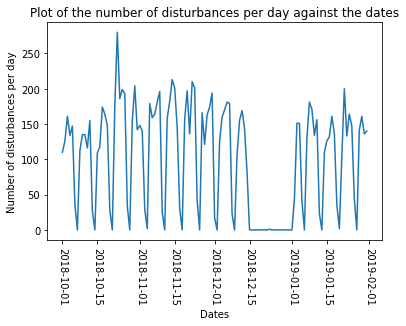

In [434]:
dailyaverage[6] = np.NaN
dailyaverage[83] = np.NaN
plt.plot(dailycounts)
plt.xticks(rotation=270)
plt.xlabel("Dates")
plt.ylabel("Number of disturbances per day")
plt.title("Plot of the number of disturbances per day against the dates")

Text(0.5, 1.0, 'Plot of the average daily quality rating against the number of disturbances per day with anomalies removed')

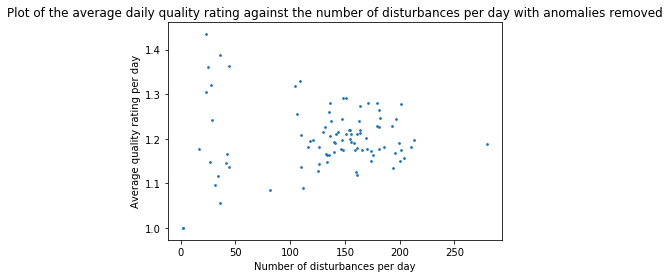

In [431]:
dailycounts[6] = 0
plt.scatter(dailycounts, dailyaverage, s=3)
plt.xlabel("Number of disturbances per day")
plt.ylabel("Average quality rating per day")
plt.title("Plot of the average daily quality rating against the number of disturbances per day with anomalies removed")

In [424]:
data2 = dailyaverage.groupby(dailyaverage.index.hour).mean()
#data3 = dailycounts.groupby(dailycounts.index.day_name()).mean()
data3 = dailycounts.groupby(dailycounts.index.hour).mean()
data3

Capture Date
0     3.950820
1     5.016393
2     3.418033
3     4.737705
4     2.598361
5     0.113821
6     4.024390
7     5.008130
8     3.731707
9     3.300813
10    4.804878
11    3.674797
12    4.739837
13    4.861789
14    4.943089
15    5.252033
16    2.934959
17    5.073171
18    5.569106
19    3.780488
20    5.772358
21    4.788618
22    4.845528
23    3.894309
Name: Quality rating, dtype: float64

Text(0.5, 1.0, 'Plot of the average quality rating against the hour of the day')

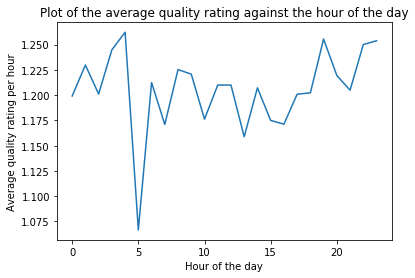

In [423]:
plt.plot(data2)
plt.xlabel("Hour of the day")
plt.ylabel("Average quality rating per hour")
plt.title("Plot of the average quality rating against the hour of the day")

In [381]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = data3.index.map(mapping)
data3 = data3.iloc[key.argsort()]
data4 = data3.iloc[0:5]
data4

Monday       113.111111
Tuesday      139.166667
Wednesday    134.944444
Thursday     144.555556
Friday       139.529412
Name: Quality rating, dtype: float64

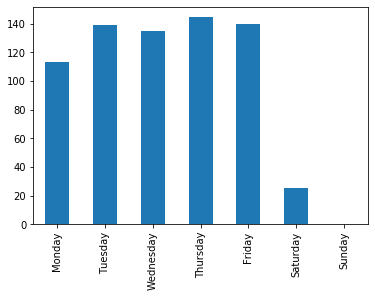

In [393]:
data3.plot(kind='bar')

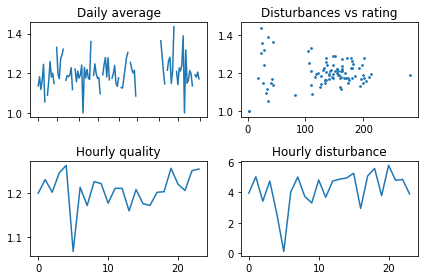

In [460]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(dailyaverage)
axs[0, 0].set_title("Daily average")
axs[0, 0].set_xticklabels([])
axs[0, 1].scatter(dailycounts, dailyaverage, s=3)
axs[0, 1].set_title("Disturbances vs rating")
axs[1, 0].plot(data2)
axs[1, 0].set_title("Hourly quality")
axs[1, 1].plot(data3)
axs[1, 1].set_title("Hourly disturbance")
fig.tight_layout()

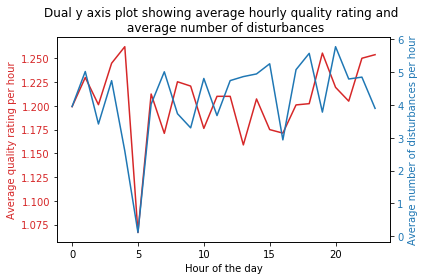

In [445]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Average quality rating per hour', color=color)
ax1.plot(data2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Dual y axis plot showing average hourly quality rating and \n average number of disturbances')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average number of disturbances per hour', color=color)  # we already handled the x-label with ax1
ax2.plot(data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()